In [57]:
BASE_DIR = '../'*3
DATASET_DIR = BASE_DIR+'code/util/dataset/dataset_dummy.ipynb'
EXTMODEL_DIR = BASE_DIR + 'code/CNN/cnn_ext_model/ext_model.ipynb'

In [58]:
%run {DATASET_DIR}
%run {EXTMODEL_DIR}

Using device: cuda
GeForce GTX 1660 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.8 GB
Using PyTorch version: 1.10.0


In [59]:
imagenet = DummyDataset('imagenet', 'select',[3,299,299],200)

200


In [60]:
CnnExtModel.set_macro('v3_preproc', 
          ['serial',
              ['conv',{'ksize':3,'stride':2,'chn':32, 'padding':'VALID'}],
              ['conv',{'ksize':3,'chn':32, 'padding':'VALID'}],
              ['conv',{'ksize':3,'chn':64, 'padding':'SAME'}],
              ['max',{'ksize':3, 'stride':2, 'padding':'VALID'}],
              ['conv',{'ksize':1,'chn':80,'padding':'VALID'}],
              ['conv',{'ksize':3,'chn':192,'padding':'VALID'}],
              ['max',{'ksize':3, 'stride':2,'padding':'VALID'}]
          
          ]
                     )

In [61]:
CnnExtModel.set_macro('v3_inception1',
        ['parallel',
            ['conv',{'ksize':1, 'chn':64}],
         
            ['serial',
                ['conv',{'ksize':1,'chn':48}],
                ['conv',{'ksize':5, 'chn':64}]],
         
            ['serial',
                ['conv',{'ksize':1,'chn':64}],
                 ['conv',{'ksize':3,'chn':96}],
                 ['conv',{'ksize':3,'chn':96}]],
         
            ['serial',
                ['avg',{'ksize':3,'stride':1}],
                ['conv',{'ksize':1,'chn':'#chn'}]]
        
        ]
                    
                     )

In [62]:
CnnExtModel.set_macro('v3_resize1',
            ['parallel',
                ['conv',{'ksize':3,'stride':2,'chn':384}],
                ['serial',
                 ['conv',{'ksize':1,'chn':64}],
                 ['conv',{'ksize':3,'chn':94}],
                 ['conv',{'ksize':3,'stride':2,'chn':96}]],
                ['max',{'ksize':3,'stride':2}]
            
            ]                     
                    
                     )

In [63]:
CnnExtModel.set_macro('v3_inception2',
    ['parallel',
        ['conv', {'ksize':1, 'chn':192}],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':'#chn'}],
            ['conv', {'ksize':[1,7], 'chn':'#chn'}],
            ['conv', {'ksize':[7,1], 'chn':192}]],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':'#chn'}],
            ['conv', {'ksize':[7,1], 'chn':'#chn'}],
            ['conv', {'ksize':[1,7], 'chn':'#chn'}],
            ['conv', {'ksize':[7,1], 'chn':'#chn'}],
            ['conv', {'ksize':[1,7], 'chn':192}]],
        ['serial',
            ['avg', {'ksize':3, 'stride':1}],
            ['conv', {'ksize':1, 'chn':192}]]])

In [64]:
CnnExtModel.set_macro('v3_resize2',
    ['parallel',
        ['serial',
            ['conv', {'ksize':1, 'chn':192}],
            ['conv', {'ksize':3, 'stride':2, 'chn':320}]],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':192}],
            ['conv', {'ksize':[1,7], 'chn':192}],
            ['conv', {'ksize':[7,1], 'chn':192}],
            ['conv', {'ksize':[3,3], 'stride':[2,2], 'chn':192}]],
        ['max', {'ksize':3, 'stride':2}]])

In [65]:
CnnExtModel.set_macro('v3_inception3',
    ['parallel',
        ['conv', {'ksize':1, 'chn':320}],
        ['serial',
            ['conv', {'ksize':[3,3], 'chn':384}],
            ['parallel',
                ['conv', {'ksize':[1,3], 'chn':384}],
                ['conv', {'ksize':[3,1], 'chn':384}]]],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':448}],
            ['conv', {'ksize':[3,3], 'chn':384}],
            ['parallel',
                ['conv', {'ksize':[1,3], 'chn':384}],
                ['conv', {'ksize':[3,1], 'chn':384}]]],
        ['serial',
            ['avg', {'ksize':3, 'stride':1}],
            ['conv', {'ksize':1, 'chn':192}]]])

In [66]:
CnnExtModel.set_macro('v3_postproc',
    ['serial',
        ['avg', {'stride':8}],
        ['dropout', {'keep_prob':0.7}]])

In [67]:
CnnExtModel.set_macro('inception_v3',
    ['serial',
        ['custom', {'name':'v3_preproc'}],
        ['custom', {'name':'v3_inception1', 'args':{'#chn':32}}],
        ['custom', {'name':'v3_inception1', 'args':{'#chn':64}}],
        ['custom', {'name':'v3_inception1', 'args':{'#chn':64}}],
        ['custom', {'name':'v3_resize1'}],
        ['custom', {'name':'v3_inception2', 'args':{'#chn':128}}],
        ['custom', {'name':'v3_inception2', 'args':{'#chn':160}}],
        ['custom', {'name':'v3_inception2', 'args':{'#chn':160}}],
        ['custom', {'name':'v3_inception2', 'args':{'#chn':192}}],
        ['custom', {'name':'v3_resize2'}],
        ['custom', {'name':'v3_inception3'}],
        ['custom', {'name':'v3_inception3'}],
        ['custom', {'name':'v3_postproc'}]])

In [68]:
inception_v3 = CnnExtModel('inception_v3', imagenet,
                   [['custom', {'name':'inception_v3'}]], dump_structure=True)

custom inception_v3
  serial
    custom v3_preproc
      serial
        1: conv, [3, 299, 299]=>[32, 148, 148]pm : 32x3x3x3+32 = 896
        2: conv, [32, 148, 148]=>[32, 146, 146]pm : 32x32x3x3+32 = 9248
        3: conv, [32, 146, 146]=>[64, 146, 146]pm : 64x32x3x3+64 = 18496
        4: max, [64, 146, 146]=>[64, 72, 72]
        5: conv, [64, 72, 72]=>[80, 72, 72]pm : 80x64x1x1+80 = 5200
        6: conv, [80, 72, 72]=>[192, 70, 70]pm : 192x80x3x3+192 = 138432
        7: max, [192, 70, 70]=>[192, 34, 34]
    custom v3_inception1
      parallel
        8: conv, [192, 34, 34]=>[64, 34, 34]pm : 64x192x1x1+64 = 12352
        serial
          9: conv, [192, 34, 34]=>[48, 34, 34]pm : 48x192x1x1+48 = 9264
          10: conv, [48, 34, 34]=>[64, 34, 34]pm : 64x48x5x5+64 = 76864
        serial
          11: conv, [192, 34, 34]=>[64, 34, 34]pm : 64x192x1x1+64 = 12352
          12: conv, [64, 34, 34]=>[96, 34, 34]pm : 96x64x3x3+96 = 55392
          13: conv, [96, 34, 34]=>[96, 34, 34]pm : 96x96x3x3

In [69]:
import torch.nn as nn
nn.ReLU()

ReLU()

In [70]:
F_DATA_DIR = BASE_DIR+ 'code/util/dataset/flower_prepro.ipynb'

%run {F_DATA_DIR}

fd = FlowersDataset([96,96], [3,96,96])

Using device: cuda
GeForce GTX 1660 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.8 GB
Using PyTorch version: 1.10.0


In [71]:
CnnExtModel.set_macro('flower_preproc',
    ['serial',
        ['conv', {'ksize':3, 'stride':2, 'chn':6, 'actions':'#act'}]])

CnnExtModel.set_macro('flower_inception1',
    ['parallel',
        ['conv', {'ksize':1, 'chn':4, 'actions':'#act'}],
        ['conv', {'ksize':3, 'chn':6, 'actions':'#act'}],
        ['serial',
            ['conv', {'ksize':3, 'chn':6, 'actions':'#act'}],
            ['conv', {'ksize':3, 'chn':6, 'actions':'#act'}]],
        ['serial',
            ['avg', {'ksize':3, 'stride':1}],
            ['conv', {'ksize':1, 'chn':4, 'actions':'#act'}]]])

CnnExtModel.set_macro('flower_resize',
    ['parallel',
        ['conv', {'ksize':3, 'stride':2, 'chn':12, 'actions':'#act'}],
        ['serial',
            ['conv', {'ksize':3, 'chn':12, 'actions':'#act'}],
            ['conv', {'ksize':3, 'stride':2, 'chn':12, 'actions':'#act'}]],
        ['avg', {'ksize':3, 'stride':2}]])

CnnExtModel.set_macro('flower_inception2',
    ['parallel',
        ['conv', {'ksize':1, 'chn':8, 'actions':'#act'}],
        ['serial',
            ['conv', {'ksize':[3,3], 'chn':8, 'actions':'#act'}],
            ['parallel',
                ['conv', {'ksize':[1,3], 'chn':8, 'actions':'#act'}],
                ['conv', {'ksize':[3,1], 'chn':8, 'actions':'#act'}]]],
        ['serial',
            ['conv', {'ksize':[1,1], 'chn':8, 'actions':'#act'}],
            ['conv', {'ksize':[3,3], 'chn':8, 'actions':'#act'}],
            ['parallel',
                ['conv', {'ksize':[1,3], 'chn':8, 'actions':'#act'}],
                ['conv', {'ksize':[3,1], 'chn':8, 'actions':'#act'}]]],
        ['serial',
            ['avg', {'ksize':3, 'stride':1}],
            ['conv', {'ksize':1, 'chn':8, 'actions':'#act'}]]])

CnnExtModel.set_macro('flower_postproc',
    ['serial',
        ['avg', {'stride':6}],
        ['dropout', {'keep_prob':0.7}]])

In [72]:
CnnExtModel.set_macro('inception_flower',
    ['serial',
        ['custom', {'name':'flower_preproc', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_inception1', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_resize', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_inception1', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_resize', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_inception2', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_resize', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_inception2', 'args':{'#act':'#act'}}],
        ['custom', {'name':'flower_postproc', 'args':{'#act':'#act'}}]])

In [73]:
conf_flower_LA = ['custom', {'name':'inception_flower', 'args':{'#act':'LA'}}]
model_flower_LA = CnnExtModel('model_flower_LA', fd, 
                         conf_flower_LA, dump_structure=True)

custom inception_flower
  serial
    custom flower_preproc
      serial
        1: conv, (3, 96, 96)=>[6, 48, 48]pm : 6x3x3x3+6 = 168
    custom flower_inception1
      parallel
        2: conv, [6, 48, 48]=>[4, 48, 48]pm : 4x6x1x1+4 = 28
        3: conv, [6, 48, 48]=>[6, 48, 48]pm : 6x6x3x3+6 = 330
        serial
          4: conv, [6, 48, 48]=>[6, 48, 48]pm : 6x6x3x3+6 = 330
          5: conv, [6, 48, 48]=>[6, 48, 48]pm : 6x6x3x3+6 = 330
        serial
          6: avg, [6, 48, 48]=>[6, 48, 48]
          7: conv, [6, 48, 48]=>[4, 48, 48]pm : 4x6x1x1+4 = 28
    custom flower_resize
      parallel
        8: conv, [20, 48, 48]=>[12, 24, 24]pm : 12x20x3x3+12 = 2172
        serial
          9: conv, [20, 48, 48]=>[12, 48, 48]pm : 12x20x3x3+12 = 2172
          10: conv, [12, 48, 48]=>[12, 24, 24]pm : 12x12x3x3+12 = 1308
        11: avg, [20, 48, 48]=>[20, 24, 24]
    custom flower_inception1
      parallel
        12: conv, [44, 24, 24]=>[4, 24, 24]pm : 4x44x1x1+4 = 180
        13: conv, 

In [84]:
EPOCH = 100
BATCH_SIZE=20
NUM_WORKERS=0
LEARNING_RATE = 0.0003

Model model_flower_LA train started 


!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): P_Block(
      (flower_preproc_1): Sequential(
        (dict): ModuleDict(
          (flower_preproc_1_1): Conv2d(3, 6, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        )
      )
    )
    (1): ReLU()
    (2): P_Block(
      (flower_inception1_2): Sequential(
        (dict): ModuleDict(
          (flower_inception1_2_1): Conv2d(6, 4, kernel_size=(1, 1), stride=(1, 1), padding=same)
          (flower_inception1_2_2): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=same)
          (flower_inception1_2_3): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=same)
          (flower_inception1_2_4): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=same)
          (flower_inception1_2_5): AvgPool2d(kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (flower_inception1_2_6): Conv2d(6, 4, kernel_size=(1, 1), stride=(1, 1), padding=same)
   

    Epoch 20: cost=1.382, accuracy=0.365/0.400 (1/73 secs)
    Epoch 21: cost=1.370, accuracy=0.372/0.370 (2/75 secs)
    Epoch 21: cost=1.376, accuracy=0.377/0.360 (2/77 secs)
    Epoch 22: cost=1.364, accuracy=0.387/0.360 (2/79 secs)
    Epoch 22: cost=1.363, accuracy=0.382/0.360 (2/81 secs)
    Epoch 23: cost=1.370, accuracy=0.379/0.420 (2/83 secs)
    Epoch 23: cost=1.376, accuracy=0.374/0.380 (1/84 secs)
    Epoch 24: cost=1.364, accuracy=0.384/0.280 (2/86 secs)
    Epoch 24: cost=1.373, accuracy=0.377/0.360 (2/88 secs)
    Epoch 25: cost=1.372, accuracy=0.381/0.370 (2/90 secs)
    Epoch 25: cost=1.370, accuracy=0.389/0.360 (2/92 secs)
    Epoch 26: cost=1.356, accuracy=0.394/0.410 (2/94 secs)
    Epoch 26: cost=1.364, accuracy=0.384/0.370 (1/95 secs)
    Epoch 27: cost=1.386, accuracy=0.376/0.360 (2/97 secs)
    Epoch 27: cost=1.358, accuracy=0.389/0.290 (2/99 secs)
    Epoch 28: cost=1.369, accuracy=0.387/0.390 (2/101 secs)
    Epoch 28: cost=1.357, accuracy=0.394/0.350 (2/103 s

    Epoch 89: cost=0.984, accuracy=0.602/0.510 (2/340 secs)
    Epoch 89: cost=0.976, accuracy=0.613/0.500 (2/342 secs)
    Epoch 90: cost=0.970, accuracy=0.618/0.470 (2/344 secs)
    Epoch 90: cost=0.972, accuracy=0.616/0.500 (2/346 secs)
    Epoch 91: cost=0.981, accuracy=0.618/0.500 (2/348 secs)
    Epoch 91: cost=0.981, accuracy=0.616/0.490 (2/350 secs)
    Epoch 92: cost=0.975, accuracy=0.624/0.470 (2/352 secs)
    Epoch 92: cost=0.981, accuracy=0.621/0.560 (2/354 secs)
    Epoch 93: cost=0.961, accuracy=0.619/0.550 (2/356 secs)
    Epoch 93: cost=0.962, accuracy=0.615/0.490 (2/358 secs)
    Epoch 94: cost=0.944, accuracy=0.627/0.550 (2/360 secs)
    Epoch 94: cost=0.948, accuracy=0.623/0.520 (2/362 secs)
    Epoch 95: cost=0.948, accuracy=0.624/0.510 (2/364 secs)
    Epoch 95: cost=0.961, accuracy=0.621/0.520 (2/366 secs)
    Epoch 96: cost=0.950, accuracy=0.616/0.530 (2/368 secs)
    Epoch 96: cost=0.944, accuracy=0.617/0.500 (2/370 secs)
    Epoch 97: cost=0.965, accuracy=0.610

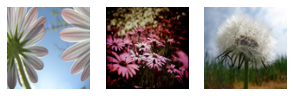

추정확률분포 [36,30,18, 2,14] => 추정 daisy : 정답 daisy => O
추정확률분포 [ 0, 0,58, 0,41] => 추정 rose : 정답 daisy => X
추정확률분포 [ 7,90, 1, 0, 2] => 추정 dandelion : 정답 dandelion => O


In [85]:
model_flower_LA.exec_all(epoch_count=EPOCH, report=80, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )
# model_flower_LA.exec_all(report=1)

In [ ]:
# F_DATA_DIR = BASE_DIR+ 'code/util/dataset/flower_prepro.ipynb'

# %run {F_DATA_DIR}

# fd = FlowersDataset([96,96], [3,96,96])